<a href="https://colab.research.google.com/github/maramatef111/Elevvo-Internship-Tasks/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # for handling imbalance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay# confusion matrix from scikit-learn


In [2]:
# Optional: adjust plot size globally
plt.rcParams['figure.figsize'] =(6,4)
pd.set_option('display.max_rows',15)
pd.set_option('display.max_columns',100)


#**Data Loading and Inspection**

In [3]:
df=pd.read_csv('loan_approval_dataset.csv')

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [8]:
# Show statistical summary
df.describe(include="number")

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df.describe(include ="object")

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


#**Data Cleaning**

##**Check Dublication**

In [10]:
df.duplicated().sum()

np.int64(0)

##**Data Format or check columns name**

In [11]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [16]:
clean_cols = [c.strip().lower().replace(' ', '_') for c in df.columns]
df.columns = clean_cols

In [17]:
num_colms = df.select_dtypes("number").columns
cat_colms = df.select_dtypes("object").columns


In [18]:
print("Numberical Columns",num_colms)
print("Catigorical columns",cat_colms)

Numberical Columns Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')
Catigorical columns Index(['education', 'self_employed', 'loan_status'], dtype='object')


In [19]:
df['self_employed'] = df['self_employed'].astype(str).str.strip().str.capitalize()
print("Unique values before mapping:", df['self_employed'].unique())
df['self_employed'] = df['self_employed'].map({"Yes": True, "No": False})
print("Value counts after mapping:", df['self_employed'].value_counts())

Unique values before mapping: ['No' 'Yes']
Value counts after mapping: self_employed
True     2150
False    2119
Name: count, dtype: int64


# **Exploratory Data Analysis (EDA)**

##**Univariate Analysis**

###**Numerical Features**

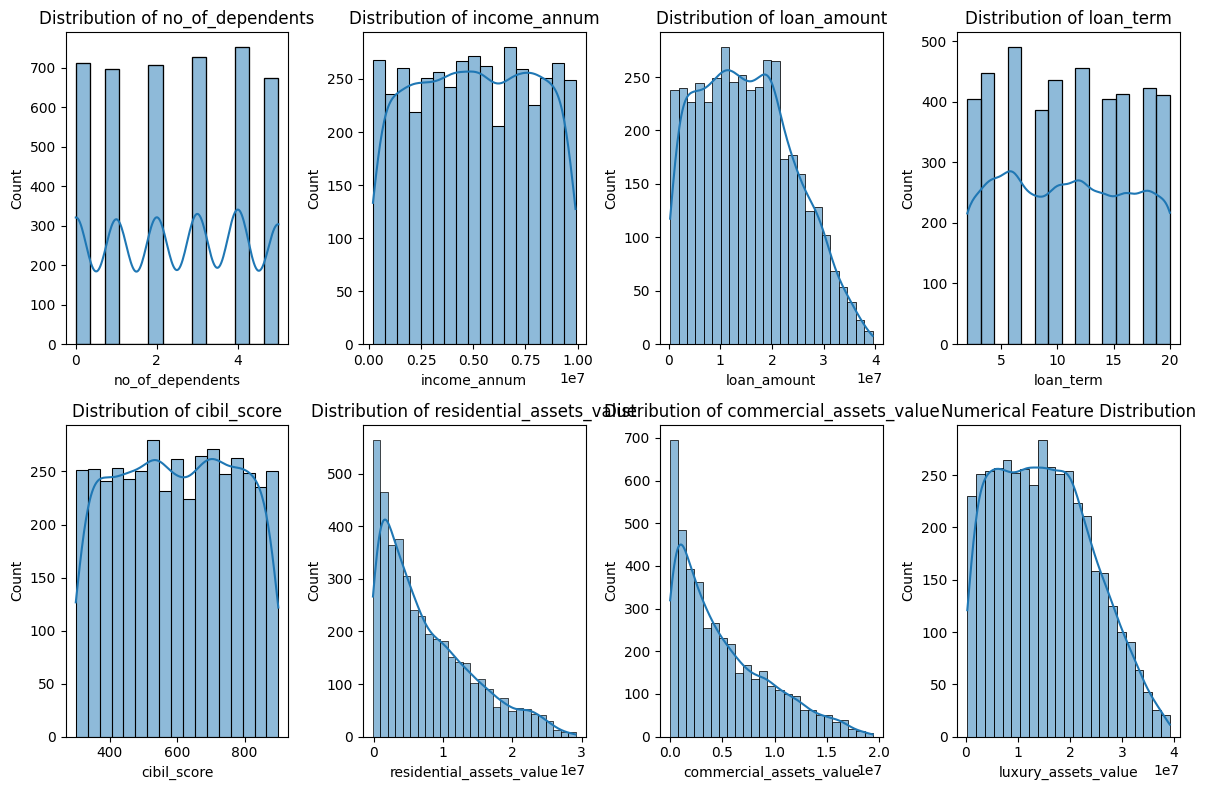

In [ ]:
df.columns = df.columns.str.strip()
num_columns = ['no_of_dependents', 'income_annum', 'loan_amount',
               'loan_term', 'cibil_score', 'residential_assets_value',
               'commercial_assets_value', 'luxury_assets_value']
fig = plt.figure(figsize=(12,8))

for i , col in enumerate(num_columns):
  plt.subplot(2,4,i+1)
  sns.histplot(data=df,x=f'{col}',kde=True)
  plt.title(f"Distribution of {col}")

plt.title("Numerical Feature Distribution")
plt.tight_layout()
plt.show()

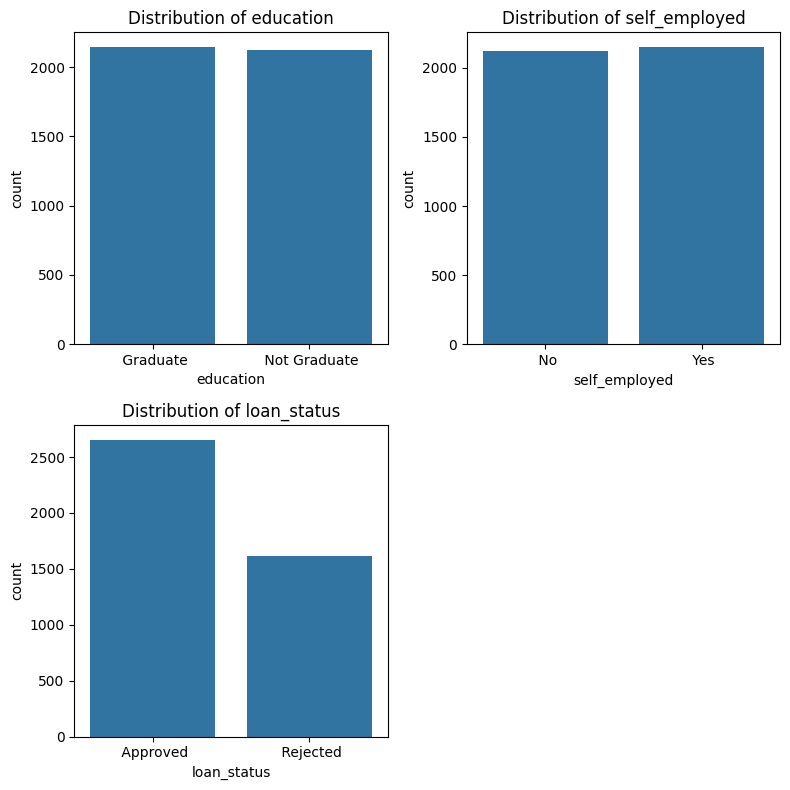

In [ ]:
cat_colms = df.select_dtypes("object").columns
fig = plt.figure(figsize=(8,8))
for i,col in enumerate(cat_colms):
  plt.subplot(2,2,i+1)
  sns.countplot(data=df,x=f'{col}')
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

##**Bivariate Analysis**

###**Income Annual vs Loan Amount by**

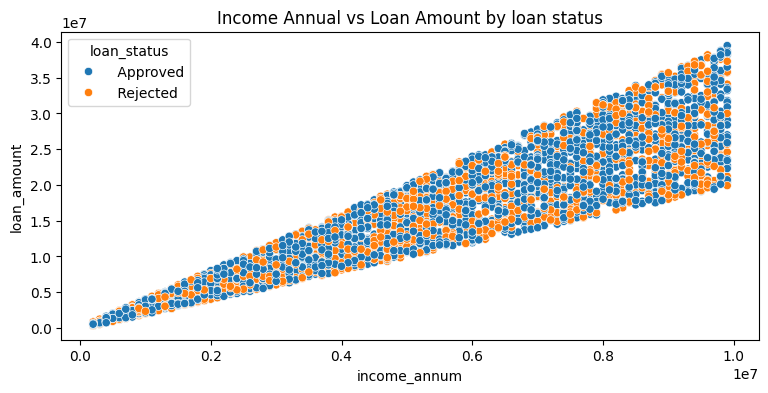

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='income_annum' , y='loan_amount', hue='loan_status',data=df)
plt.title("Income Annual vs Loan Amount by loan status")
plt.show()

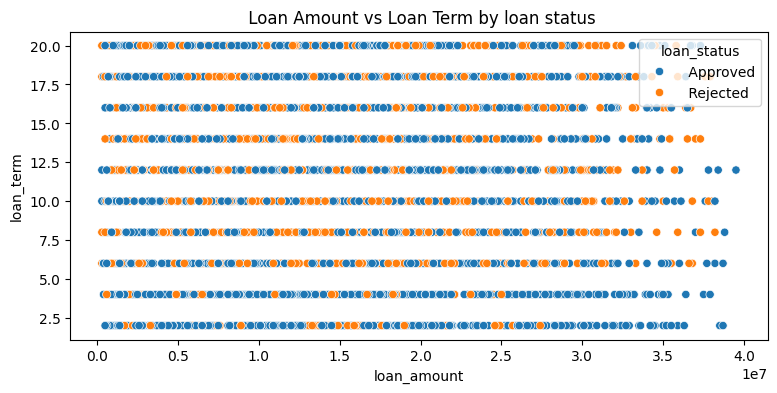

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='loan_amount' , y='loan_term', hue='loan_status',data=df)
plt.title(" Loan Amount vs Loan Term by loan status")
plt.show()

##**Correlation Analysis**

###**Correlation for Numerical Features**

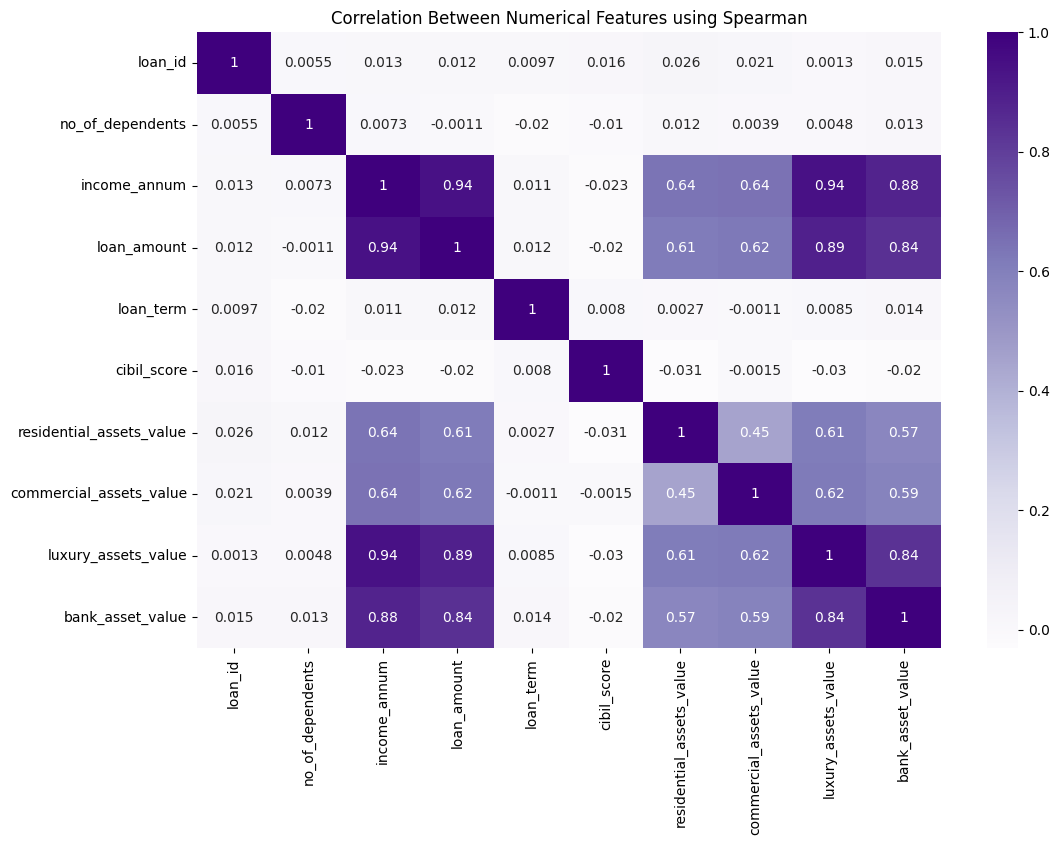

In [ ]:
num_colms = df.select_dtypes("number").columns
plt.figure(figsize=(12,8))
num_corr = df[num_colms].corr(method='spearman')

sns.heatmap(num_corr, annot=True, cmap='Purples')
plt.title("Correlation Between Numerical Features using Spearman")
plt.show()

##**Outlier Detection and Handling (IQR Method)**

Outliers after handling:  0



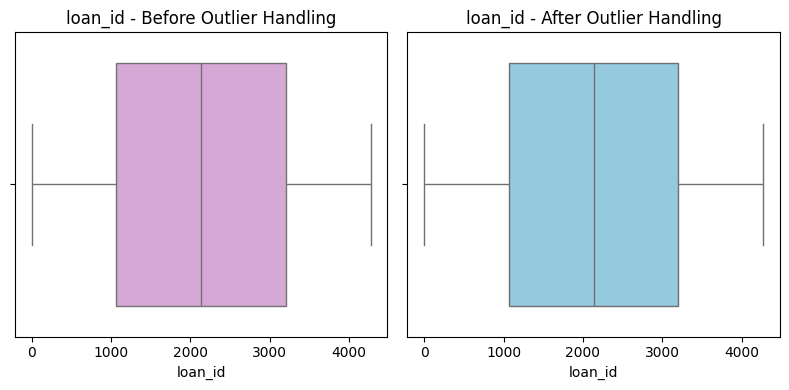

/tmp/ipython-input-9071329.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper, col] = upper


Outliers after handling:  0



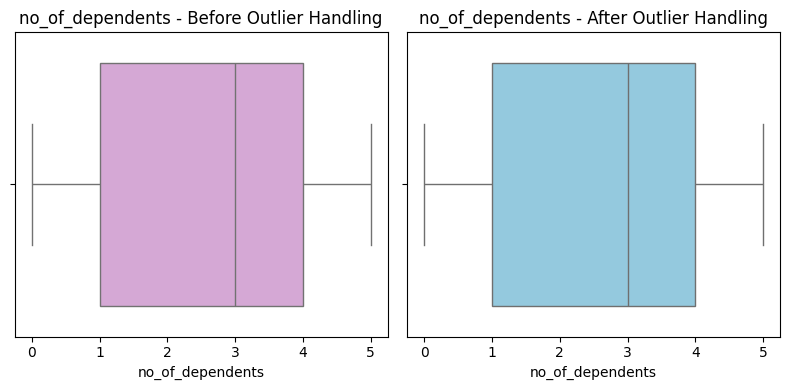

Outliers after handling:  0



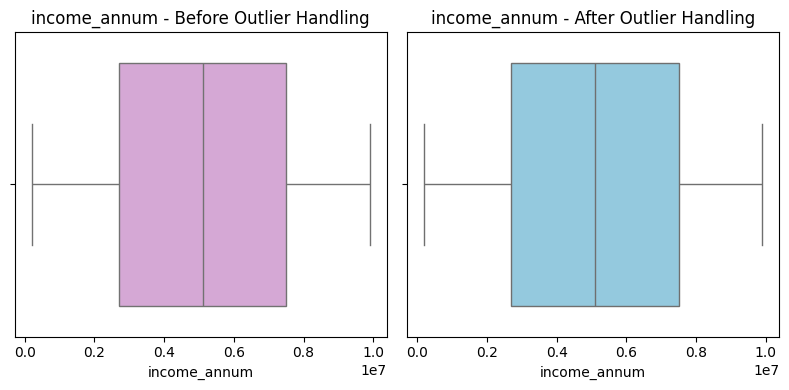

Outliers after handling:  0



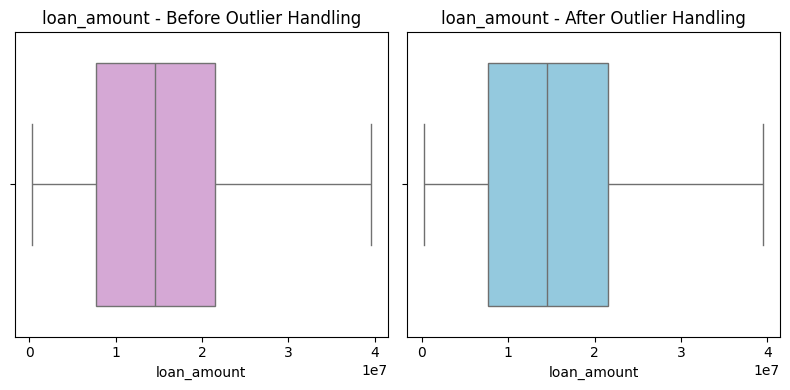

Outliers after handling:  0



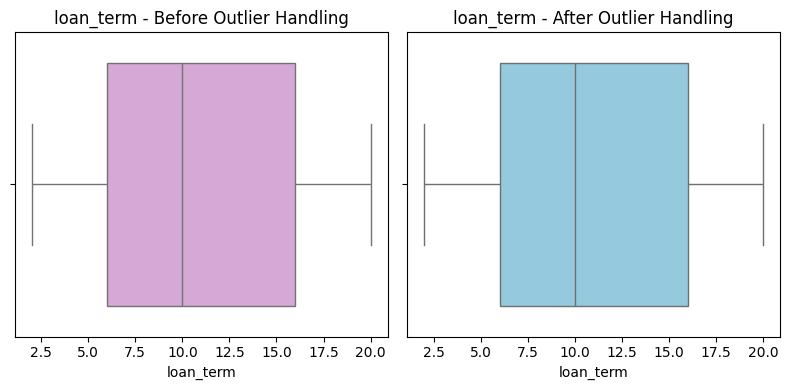

/tmp/ipython-input-9071329.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1190.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper, col] = upper


Outliers after handling:  0



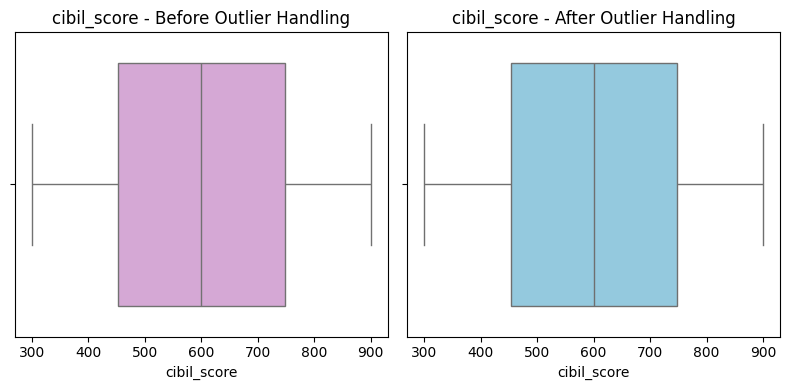

Outliers after handling:  0



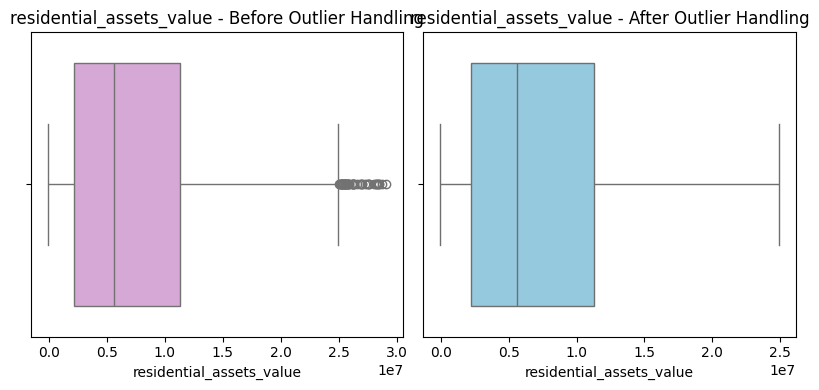

Outliers after handling:  0



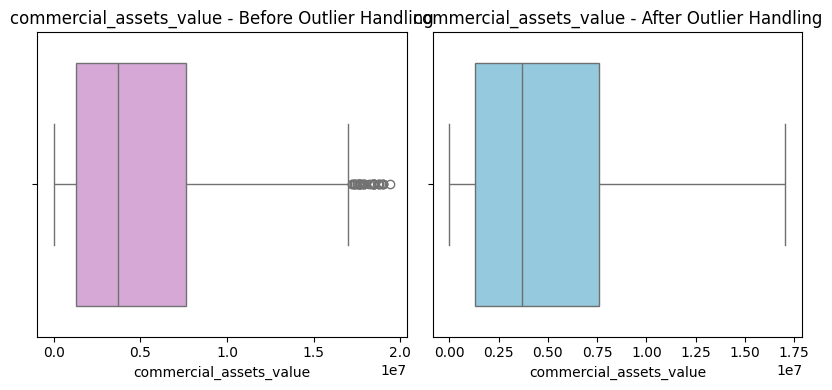

Outliers after handling:  0



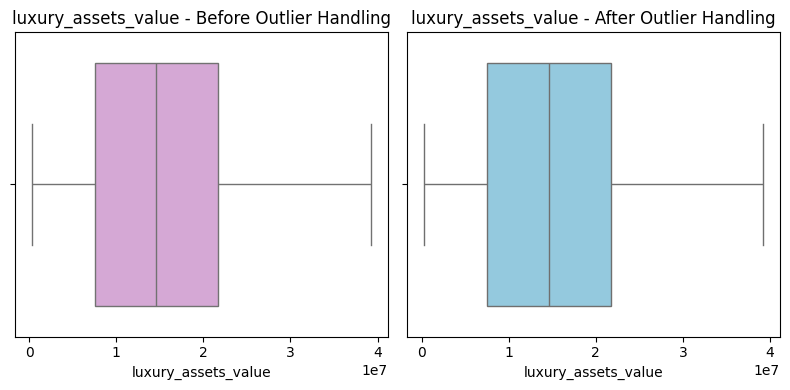

Outliers after handling:  0



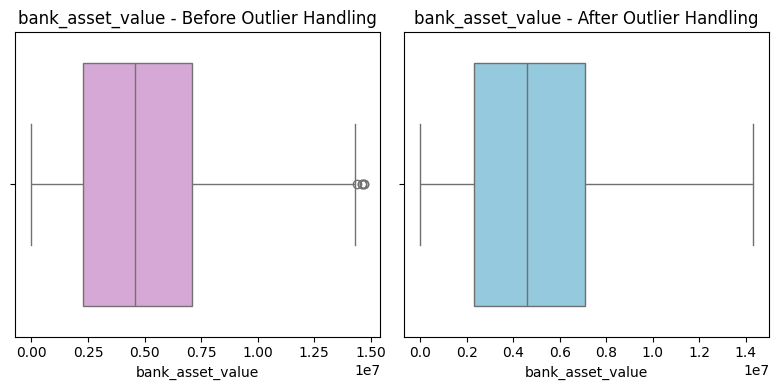

In [21]:
for col in num_colms:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # before handling outliers
    Outliers_before = df[(df[col] < lower) | (df[col] > upper)]
    count_before = len(Outliers_before)

    # copy of the column before capping to plot
    col_before = df[col].copy()

    # handle outliers by capping
    df.loc[df[col] > upper, col] = upper
    df.loc[df[col] < lower, col] = lower

    # After handling outliers
    Outliers_after = df[(df[col] < lower) | (df[col] > upper)]
    count_after = len(Outliers_after)
    print(f"Outliers after handling:  {count_after}")
    print("="*50 + "\n")

    # plot before and after handling
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    sns.boxplot(x=col_before, ax=axes[0],color = 'plum')
    axes[0].set_title(f"{col} - Before Outlier Handling")

    sns.boxplot(x=df[col], ax=axes[1],color = 'skyblue')
    axes[1].set_title(f"{col} - After Outlier Handling")

    plt.tight_layout()
    plt.show()

#**Label Encoding of Categorical Features**

In [22]:
le = LabelEncoder()
for col in cat_colms:
  df[col]= le.fit_transform(df[col])

In [23]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,0,0,9600000,29900000,12,778.0,2400000,17050000,22700000,8000000,0
1,2,0.0,1,1,4100000,12200000,8,417.0,2700000,2200000,8800000,3300000,1
2,3,3.0,0,0,9100000,29700000,20,506.0,7100000,4500000,33300000,12800000,1
3,4,3.0,0,0,8200000,30700000,8,467.0,18200000,3300000,23300000,7900000,1
4,5,5.0,1,1,9800000,24200000,20,382.0,12400000,8200000,29400000,5000000,1


#**Feature Scaling with StandardScaler**

In [24]:
scaler= StandardScaler()
df[num_colms] = scaler.fit_transform(df[num_colms])

In [25]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-1.731645,-0.294102,0,0,1.617979,1.633052,0.192617,1.032792,-0.783495,2.770319,0.832028,0.930707,0
1,-1.730834,-1.473548,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.736995,-0.633638,-0.694993,-0.515991,1
2,-1.730022,0.295621,0,0,1.439822,1.610933,1.594031,-0.544840,-0.055003,-0.106426,1.996520,2.408185,1
3,-1.729211,0.295621,0,0,1.119139,1.721525,-0.508091,-0.771045,1.665478,-0.381493,0.897943,0.899926,1
4,-1.728399,1.475067,1,1,1.689242,1.002681,1.594031,-1.264055,0.766488,0.741698,1.568075,0.007282,1


##**Splitting Data into Training and Testing Sets**

In [26]:
X = df.drop('loan_status',axis = 1)
y = df['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 42)

#**Handling Imbalanced Data with SMOTE**

In [27]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#**Model Training – Logistic Regression vs Decision Tree**

##**Logistic Regression**

In [28]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("===========================")
# Recall,Precision, f1_score,accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")


Confusion Matrix:
 [[486  50]
 [ 26 292]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       536
           1       0.85      0.92      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Precision: 0.854
Recall:    0.918
F1-score:  0.885


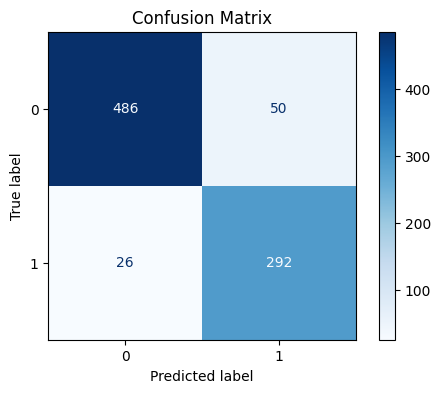

In [29]:
# confusion matrix from scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

##**Desicion Tree**

In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("===========================")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")


Confusion Matrix:
 [[524  12]
 [ 10 308]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Precision: 0.963
Recall:    0.969
F1-score:  0.966


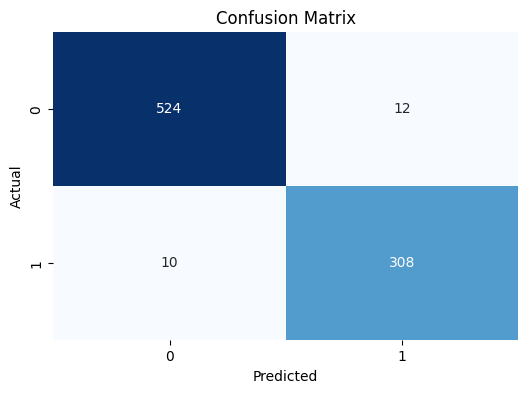

In [31]:
# confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Model Evaluation and Comparison

The Decision Tree model outperformed Logistic Regression in terms of both **recall** and **precision**.  
This indicates that the Decision Tree was better at correctly identifying the positive class (higher recall)  
while also making fewer false positive predictions (higher precision).  

Therefore, the Decision Tree model is more effective than Logistic Regression for this dataset.